### Step 1: Download the dataset from the link available above. 

### Step 2: Perform proper analysis of the dataset and draw conclusions based on your analysis.

### Step 3: Build a Machine Learning Model to predict output based on the input column.

### Step 4: **Bonus (max weightage) Make sure to apply:

### Proper outlier detection and treatment.

### Feature Engineering

### Hyperparameter Tuning

### Step 5: Use appropriate evaluation metrics and compare all the models and write your observations i.e. why is one model better than the other?

### Step 6: **Bonus (max weightage) Build a Linear Regression model by performing appropriate feature engineering.

In [47]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("/home/jeet-mac/Downloads/dataframe_.csv")

In [49]:
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [51]:
print(df.describe())

             input       output
count  1696.000000  1696.000000
mean      1.159933   -34.088017
std      79.005970    65.771112
min    -134.962839  -132.422167
25%     -63.386506   -80.026767
50%      10.195194   -50.470981
75%      70.264109   -11.000000
max     134.605775   134.425495


In [52]:
print(df.isnull().sum()) #checking dataset having null values or not

input     1
output    1
dtype: int64


In [53]:
df.dropna(inplace=True)

In [54]:
print(df.isnull().sum())

input     0
output    0
dtype: int64


In [55]:
#lets  check we have duplicate values or not ?

df.duplicated(subset=df.columns).sum()

606

In [56]:
df.drop_duplicates(inplace=True,ignore_index=True)  #for droping duplicate values

In [57]:
df.duplicated(subset=df.columns).sum()

0

<AxesSubplot:xlabel='input', ylabel='Density'>

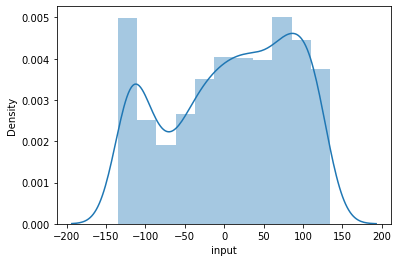

In [58]:
import seaborn as sns
sns.distplot(df['input'])

#If the distributions are normal, it is easier to apply regression models. 
#If not, we need to apply transformations such as log, square root, 
#or box-cox transformations to make the distribution normal.

<AxesSubplot:xlabel='output', ylabel='Density'>

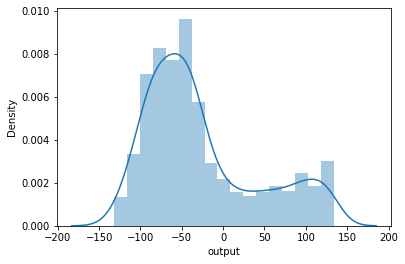

In [59]:
sns.distplot(df['output'])

In [60]:
# both are appropreate normal distribution

<AxesSubplot:xlabel='input'>

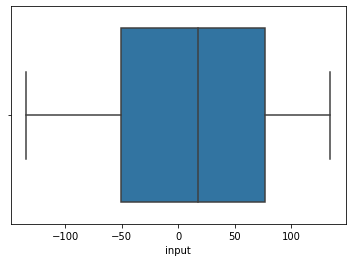

In [61]:
sns.boxplot(x=df['input'])

#If there are outliers, we need to decide on how to deal with them. 
#One way is to remove them, while another way is to cap them at a certain value or 
#transform them using logarithmic or other transformation techniques.

In [63]:
# this column has no outliers

In [64]:
#the data is regression so we will use regeression algorithom

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
fv=df[['input']]
cl=df[['output']]

In [68]:
x_train,x_test,y_train,y_test=train_test_split(fv,cl,train_size=0.8) #training data 80%

In [69]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
trans_train = std.fit_transform(x_train)
trans_test = std.transform(x_test)

In [70]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [71]:
model=lr.fit(trans_train,y_train)

In [72]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [74]:
predi=model.predict(trans_test)

In [75]:
# we will do performance metrics here

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [77]:
mean_squared_error(y_test,predi)

2523.2244594406293

In [78]:
mean_absolute_error(y_test,predi)

40.036092187424025

In [79]:
r2_score(y_test,predi)

0.3878964593990032

In [80]:
model.coef_

array([[32.77205399]])

In [81]:
model.intercept_

array([-26.14379315])

In [82]:
model.predict(fv).reshape(len(model.predict(fv)))

array([-4048.60757188, -4008.97803113, -4447.65162391, ...,
       -3629.17402597, -3680.731467  , -3642.35057429])

In [83]:
# Feature engineering for SQUARE

In [84]:
df['inputsquare']=df['input']**2
df

,input,output,inputsquare
0,-122.740667,-130.572085,15065.271434
1,-121.531419,-129.938929,14769.885901
2,-134.917019,-130.141832,18202.602016
3,-120.605951,-125.760932,14545.795441
4,-129.894781,-112.785214,16872.654053
...,...,...,...
1085,-112.018496,121.096397,12548.143513
1086,-119.954237,123.609122,14389.019022
1087,-109.942155,127.197394,12087.277402
1088,-111.515368,128.170885,12435.677389


In [85]:
fv=df[['input','inputsquare']]
cl=df[['output']]
x_train,x_test,y_train,y_test=train_test_split(cl,fv,train_size=0.8)

In [86]:
std = StandardScaler()
trans_train = std.fit_transform(x_train)
trans_test = std.transform(x_test)

In [87]:
model=lr.fit(trans_train,y_train)

In [88]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [89]:
predi=model.predict(trans_test)

In [90]:
mean_squared_error(y_test,predi)

8690265.866724404

In [91]:
mean_absolute_error(y_test,predi)

1652.8303577732302

In [92]:
r2_score(y_test,predi)

0.25210827451044493

In [93]:
model.coef_

array([[  41.70373846],
       [2836.9695256 ]])

In [94]:
model.intercept_

array([   7.78513479, 6513.51520346])

In [95]:
# for cube 

In [101]:
df['inputcube']=df['input']**3
cl=df[['input','inputcube','inputsquare']]
fv=df[['output']]

In [103]:
x_train,x_test,y_train,y_test=train_test_split(fv,cl,train_size=0.8)

In [104]:
std = StandardScaler()

In [105]:
trans_train = std.fit_transform(x_train)
trans_test = std.transform(x_test)

In [106]:
model=lr.fit(trans_train,y_train)
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [107]:
predi=model.predict(trans_test)
mean_squared_error(y_test,predi)

209977321066.939

In [108]:
mean_absolute_error(y_test,predi)

194530.58218196055

In [109]:
r2_score(y_test,predi)

0.29961285365023665

In [ ]:
#PolynomialFeatures

In [112]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
pf = PolynomialFeatures(degree=7)
new= df[["input"]]
new_p = pf.fit_transform(new)

In [114]:
new_p

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04, ...,
        -2.78575169e+10,  3.41925021e+12, -4.19681053e+14],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04, ...,
        -2.65120220e+10,  3.22204366e+12, -3.91579539e+14],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04, ...,
        -4.47026927e+10,  6.03115404e+12, -8.13705325e+14],
       ...,
       [ 1.00000000e+00, -1.09942155e+02,  1.20872774e+04, ...,
        -1.60627989e+10,  1.76597873e+12, -1.94155507e+14],
       [ 1.00000000e+00, -1.11515368e+02,  1.24356774e+04, ...,
        -1.72454137e+10,  1.92312866e+12, -2.14458401e+14],
       [ 1.00000000e+00, -1.10344221e+02,  1.21758472e+04, ...,
        -1.63586693e+10,  1.80508463e+12, -1.99180658e+14]])

In [115]:
scaler = StandardScaler()
new_norm = scaler.fit_transform(new_p)

In [116]:
new_norm

array([[ 0.        , -1.66203185,  1.5981244 , ..., -2.04389419,
         1.8343436 , -2.00714939],
       [ 0.        , -1.64667302,  1.54448397, ..., -1.94354612,
         1.69094386, -1.8687898 ],
       [ 0.        , -1.81668546,  2.16784681, ..., -3.30022066,
         3.73360265, -3.94715307],
       ...,
       [ 0.        , -1.49947609,  1.05733665, ..., -1.16423485,
         0.6321589 , -0.89675996],
       [ 0.        , -1.5194577 ,  1.12060422, ..., -1.25243519,
         0.74643127, -0.99672256],
       [ 0.        , -1.50458279,  1.07342045, ..., -1.18630109,
         0.66059495, -0.92150161]])

In [117]:
y = df["output"]
x_train, x_test, y_train, y_test = train_test_split(new_norm, y, test_size=0.2)

In [118]:
model = LinearRegression().fit(x_train, y_train)

In [119]:
y_pred = model.predict(x_test)

In [120]:
model.fit(x_train, y_train)

LinearRegression()

In [121]:
y_pred = model.predict(x_test)

In [122]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [123]:
mse

1413.0876848674598

In [124]:
r2

0.6684024975493745

In [151]:
 # Using KNN

In [126]:
data = pd.read_csv("/home/jeet-mac/Downloads/dataframe_.csv")

In [127]:
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [128]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [129]:
data.dropna(inplace=True)

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [144]:
datac=data.copy() #for makind a different copy of original data

In [145]:
fv=data[['input']]
cl=data[['output']]

In [146]:
x_train,x_test,y_train,y_test = train_test_split(fv,cl,train_size=0.8,random_state=1)
x_train_cv,x_cv,y_train_cv,y_cv=train_test_split(x_train,y_train,train_size=0.8,random_state=1)

In [147]:
std = StandardScaler()
transfromed_train = std.fit_transform(x_train_cv)
transfromed_cv = std.transform(x_cv)
transfromed_test = std.transform(x_test)

In [148]:
k_value=[]
train_error=[]
def train_er(n):
    for i in range(1,n):
        if i>0 and i%2!=0:
            knn=KNeighborsClassifier(n_neighbors=i)
            model=knn.fit(transfromed_train,y_train_cv)
            y_predi=model.predict(transfromed_train)
            k_value.append(i)
            
            print("for k:",i,"=",accuracy_score(y_train_cv,y_predi),"--- with train_error:",1-accuracy_score(y_train_cv,y_predi))
            train_error.append(1-accuracy_score(y_train_cv,y_predi))

In [149]:
k_value=[]
cv_error=[]
def cv_er(k):
    for i in range(1,k):
        if i>0 and i%2!=0:
            knn= KNeighborsClassifier(n_neighbors=i)
            model= knn.fit(transfromed_train,y_train_cv)
            y_predi= model.predict(transfromed_train)
            k_value.append(i)
            print("for k:",i,"=",accuracy_score(y_cv,y_predi),"--- with cv_error:",1-accuracy_score(y_cv,y_predi))
            cv_error.append(1-accuracy_score(y_cv,y_predi))